Bryan Jay - 260738764

## 2 - Stereo Vision

##### Q2.1 Depth Estimation from Stereo Images

In [59]:
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt

def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

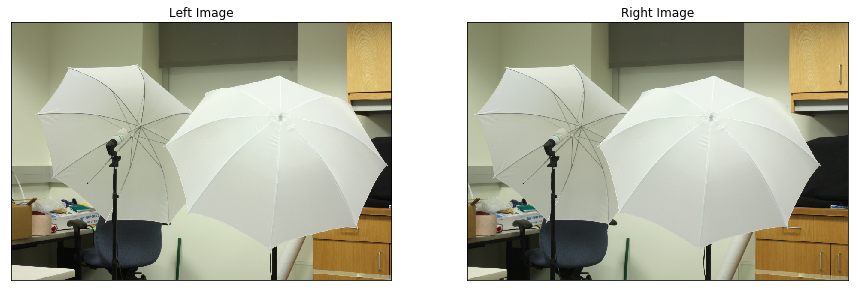

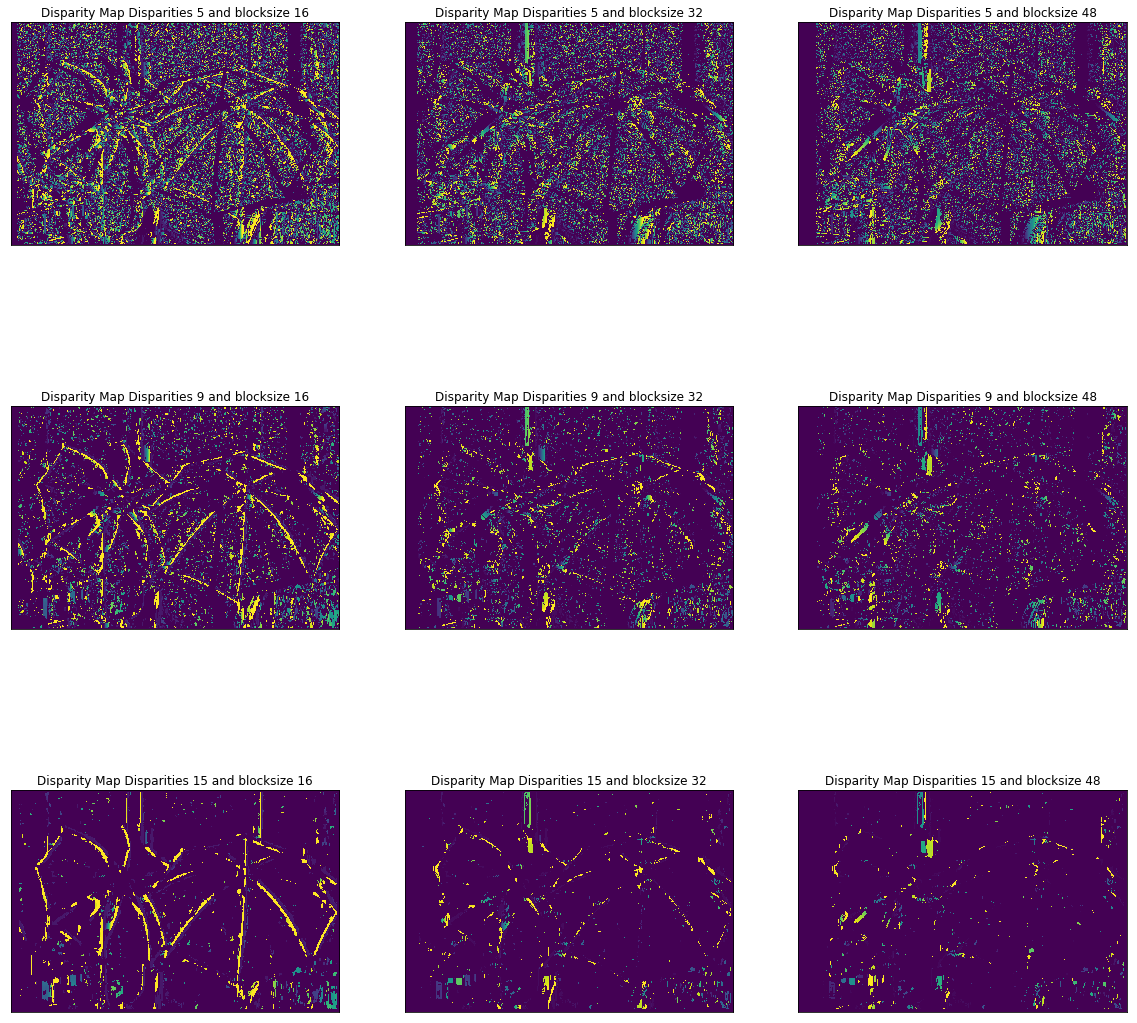

In [78]:
import cv2

# load left and right images 
imgL = cv2.imread('umbrella0.png')
imgR = cv2.imread('umbrella1.png')

# resize images to process quicker
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)

imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)

# put all the disparities and block size possibilities into a list
points = [(5, 16), (5, 32), (5, 48), (9, 16), (9, 32), (9, 48), (15, 16), (15, 32), (15, 48)]

disparity = list()
# compute disparity map for the 9 diagrams
for point in points:
    stereo = cv2.StereoBM_create(numDisparities=point[1], blockSize=point[0])
    disparity.append(stereo.compute(imgR_gray, imgL_gray))
    
# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20,20))
for i in range(len(points)):
    plt.subplot(331+i), plt.imshow(disparity[i])
    plt.title("Disparity Map Disparities %d and blocksize %d" %points[i]), plt.xticks([]), plt.yticks([])
plt.show()


##### Q2.1 Pixel-Wise Squared difference error 

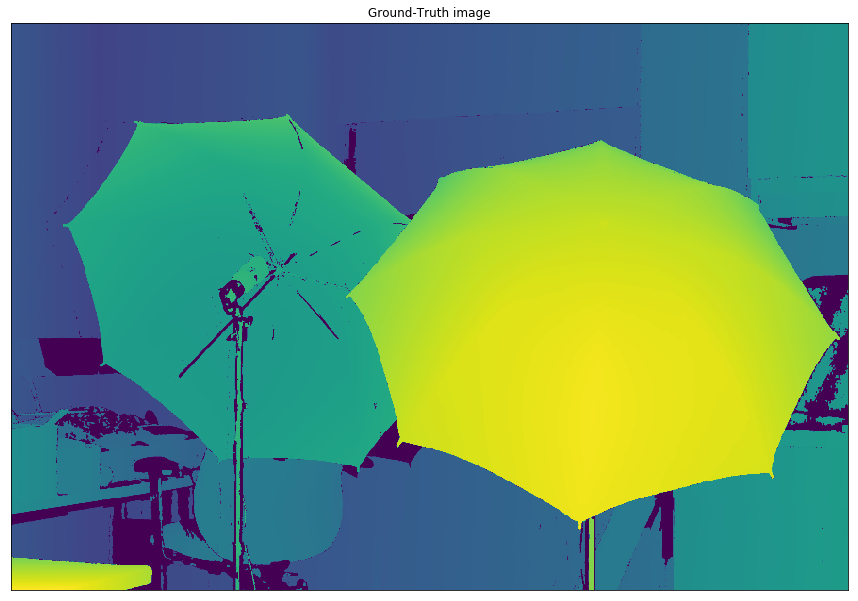

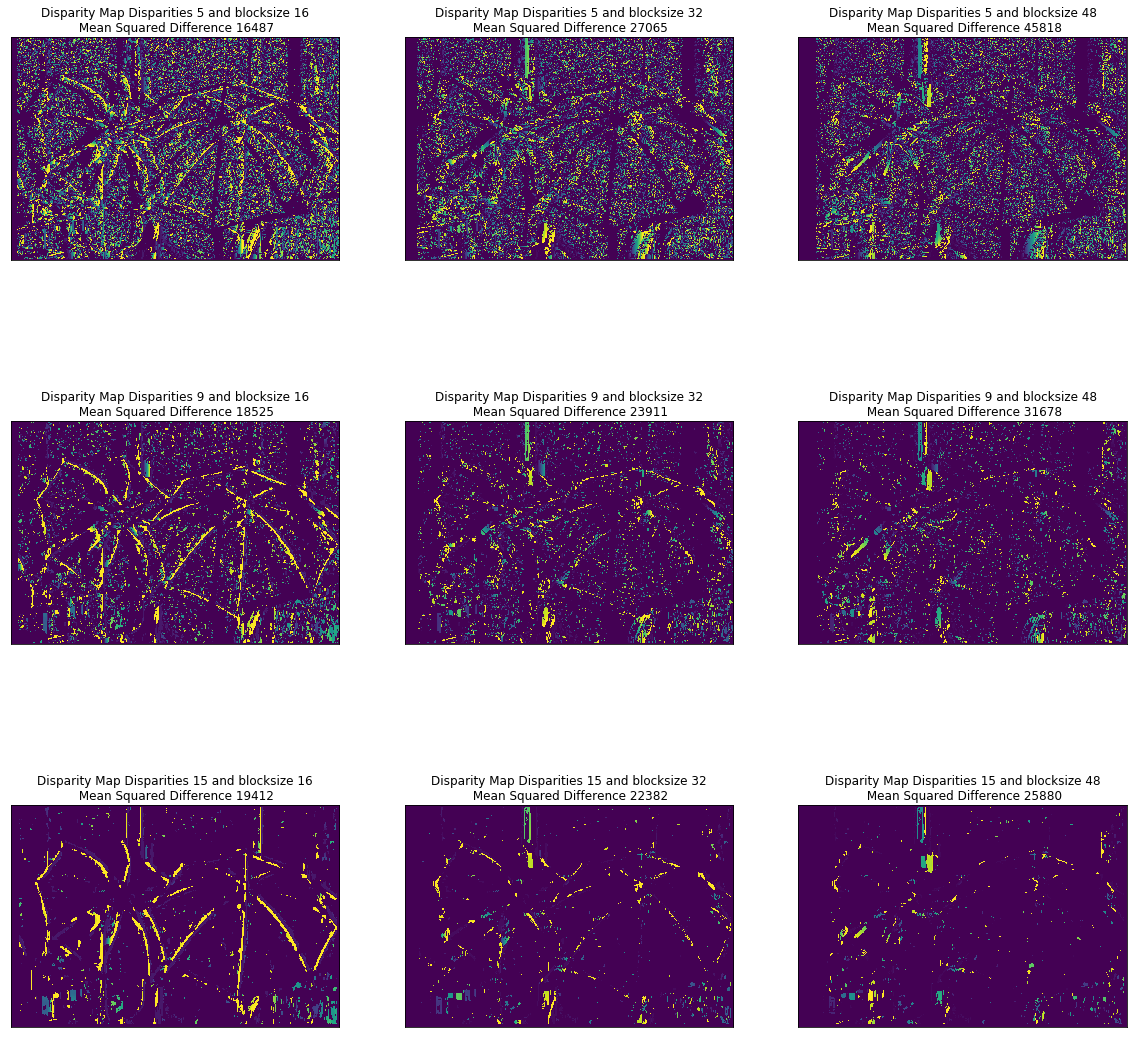

In [88]:
# load left and right images
groundtruth = read_pfm("disp0.pfm")
# groundtruth = read_pfm("disp1.pfm")
groundtruth[groundtruth==np.inf] = 0

# resize the ground truth image
groundtruth = cv2.resize(groundtruth, None, fx=0.3, fy=0.3)

mse = list()
for i in range(9):
    mse.append(((disparity[i]-groundtruth)**2).mean(axis=None))
    
plt.figure(figsize=(15,15))
plt.imshow(groundtruth)
plt.title('Ground-Truth image'), plt.xticks([]), plt.yticks([])
    
# print(min(mse))
    
plt.figure(figsize=(20,20))
for i in range(len(points)):
    plt.subplot(331+i), plt.imshow(disparity[i])
    plt.title("Disparity Map Disparities %d and blocksize %d\n Mean Squared Difference %d" % (points[i] + (mse[i], )))
    plt.xticks([]), plt.yticks([])
plt.show()